In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
backend = Aer.get_backend('qasm_simulator')

# Trainability

## 1D, Constant Function

### Generate Data

In [ ]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = 0.5*np.ones((n,1))

x = scaler(x, a=0, b=np.pi)

In [ ]:
plt.plot(x, y, 'o')
plt.show()

### Training Models

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [1, 4],
                         dim = [1, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)


In [ ]:
saver(qnn_list, data_path("trainability_qnn_1D_reps_1_constant"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [1, 4],
                         dim = [1, 4, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_2_constant"))

In [ ]:
np.random.seed(42)

dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 3, 1],
                         lr = 0.1)
    
    dnn.train(x, y, epochs=1000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D_constant"))

## 1D, Gaussian Function

### Generate Data

In [ ]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.3, 0.02) - gaussian(x, 0.7, 0.02) 

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)
print(y.shape)

In [ ]:
plt.plot(x, y, 'o')
plt.show()

### Training Models

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [1, 4],
                         dim = [1, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_1"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [1, 4],
                         dim = [1, 4, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_2"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 5, 1],
                         lr = 0.1)
    
    dnn.train(x, y, epochs=1000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D"))

## 2D function

### Generate Data

In [ ]:
np.random.seed(42)

n = 10
x = np.linspace(0, 1, n)
x = generate_meshgrid([x,x])

mean1 = np.array([[0.25, 0.75]])
var1 = np.array([[0.02, 0], [0, 0.02]])

mean2 = np.array([[0.75, 0.25]])
var2 = np.array([[0.02, 0], [0, 0.02]])

mean3 = np.array([[0.25, 0.25]])
var3 = np.array([[0.02, 0], [0, 0.02]])

mean4 = np.array([[0.75, 0.75]])
var4 = np.array([[0.02, 0], [0, 0.02]])

y = gaussian(x, mean1, var1) + gaussian(x, mean2, var2) - gaussian(x, mean3, var3) - gaussian(x, mean4, var4)


x_qnn = scaler(x, a=0, b=np.pi)
x_dnn = (x - np.mean(x, axis=0))/np.std(x, axis=0)
y = scaler(y, a=0, b=1)

In [ ]:
plt.imshow(y.reshape(n,n))
plt.show()

### Training Models

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [2, 4],
                         dim = [2, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_1"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [2, 4],
                         dim = [2, 4, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_2"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [2, 4],
                         dim = [2, 4, 1],
                         reps = 3,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_3"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [2, 6, 1],
                     lr = 0.1)
    
    dnn.train(x_dnn, y, epochs=5000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D"))

## 3D function

### Constant Function

In [ ]:
np.random.seed(42)

n = 5
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])
x = scaler(x, a=0, b=np.pi)

y = 0.5*np.ones((n**3, 1))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(q_bits = [3, 4],
                         dim = [3, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_constant_reps_1"))

### Generate Data

In [ ]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x_qnn = scaler(x, a=0, b=np.pi)
x_dnn = (x - np.mean(x, axis=0))/np.std(x, axis=0)

y = scaler(y, a=0.1, b=0.9)

In [ ]:
plt.imshow(y.reshape(n,n,n)[0])
plt.show()

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [3],
                         dim = [3, 1],
                         reps = 5,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_single_circuit"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [3, 4],
                         dim = [3, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_1"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [3, 4],
                         dim = [3, 4, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_2"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [3, 4],
                         dim = [3, 4, 1],
                         reps = 3,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_3"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [3, 6, 1],
                     lr = 0.1)
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D"))

### Deep QKN

In [3]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0, b=1)

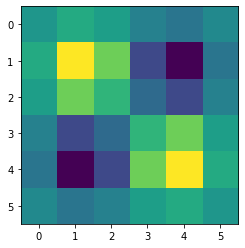

In [4]:
plt.imshow(y.reshape(n,n,n)[0])
plt.show()

In [5]:
np.random.seed(42)


qnn = sequential_qnn(q_bits = [3, 4, 4],
                     dim = [3, 4, 4, 1],
                     reps = 2,
                     backend=backend,
                     shots=10000,
                     lr = 0.1)

qnn.train(x, y, epochs=200, verbose=True)
    
saver(qnn, data_path("trainability_qnn_3D_deep"))

  0%|          | 0/200 [00:00<?, ?it/s]

epoch: 0, loss: 0.08681820257953562
epoch: 1, loss: 0.041834626318367055
epoch: 2, loss: 0.030764183752753152
epoch: 3, loss: 0.030854154510674633
epoch: 4, loss: 0.027349185144395563
epoch: 5, loss: 0.024184273954449418
epoch: 6, loss: 0.023463810765264218
epoch: 7, loss: 0.02284640542904513
epoch: 8, loss: 0.021705359648388052
epoch: 9, loss: 0.020957780899492212
epoch: 10, loss: 0.02056930225577983
epoch: 11, loss: 0.020036360574940786
epoch: 12, loss: 0.020031432065865787
epoch: 13, loss: 0.01968681333393826
epoch: 14, loss: 0.019643842219174652
epoch: 15, loss: 0.019295967401079906
epoch: 16, loss: 0.01857926016724448
epoch: 17, loss: 0.018049415934551557
epoch: 18, loss: 0.01731076541284274
epoch: 19, loss: 0.016759600901455105
epoch: 20, loss: 0.016418606605457936
epoch: 21, loss: 0.01600053785377297
epoch: 22, loss: 0.015413899563708377
epoch: 23, loss: 0.015064040220536909
epoch: 24, loss: 0.014933740495407629
epoch: 25, loss: 0.014023004359444506
epoch: 26, loss: 0.0133880685

NameError: name 'qnn_list' is not defined

In [33]:
x = scaler(x, mode="standard")

dnn = sequential_dnn(dim = [3, 6, 5, 1], lr = 0.1)

dnn.train(x, y, epochs=1000, verbose=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

epoch: 0, loss: 0.23040794405658338
epoch: 1, loss: 0.19962964151939672
epoch: 2, loss: 0.15928580471839227
epoch: 3, loss: 0.11579217207718344
epoch: 4, loss: 0.07617230656924423
epoch: 5, loss: 0.04596884288025058
epoch: 6, loss: 0.028546550835629465
epoch: 7, loss: 0.023986378544234903
epoch: 8, loss: 0.028684664563934967
epoch: 9, loss: 0.03567006261292695
epoch: 10, loss: 0.040136820284602116
epoch: 11, loss: 0.041270860187530393
epoch: 12, loss: 0.03989768065738124
epoch: 13, loss: 0.03708761330027705
epoch: 14, loss: 0.033695331292575716
epoch: 15, loss: 0.03031970932452126
epoch: 16, loss: 0.02737750144981317
epoch: 17, loss: 0.025151397072764477
epoch: 18, loss: 0.023791756392020958
epoch: 19, loss: 0.023302188197625022
epoch: 20, loss: 0.023541995667862126
epoch: 21, loss: 0.024261577267008366
epoch: 22, loss: 0.025165116388688995
epoch: 23, loss: 0.025979522021630234
epoch: 24, loss: 0.026507358737888564
epoch: 25, loss: 0.02665214452536708
epoch: 26, loss: 0.026416986069154

epoch: 349, loss: 0.0160771575389952
epoch: 350, loss: 0.016070121649598448
epoch: 351, loss: 0.016062988057065755
epoch: 352, loss: 0.016055787781896556
epoch: 353, loss: 0.016048557707712602
epoch: 354, loss: 0.016041337148529074
epoch: 355, loss: 0.01603416384375305
epoch: 356, loss: 0.01602706998354917
epoch: 357, loss: 0.01602007891683986
epoch: 358, loss: 0.016013203191047626
epoch: 359, loss: 0.01600644441050161
epoch: 360, loss: 0.015999794989285165
epoch: 361, loss: 0.01599324133759306
epoch: 362, loss: 0.01598676764561719
epoch: 363, loss: 0.01598035939021308
epoch: 364, loss: 0.01597400590711001
epoch: 365, loss: 0.01596770166355657
epoch: 366, loss: 0.015961446151298898
epoch: 367, loss: 0.015955242616795144
epoch: 368, loss: 0.015949096137860937
epoch: 369, loss: 0.015943011727479296
epoch: 370, loss: 0.01593699306737645
epoch: 371, loss: 0.015931042138797324
epoch: 372, loss: 0.015925159583846944
epoch: 373, loss: 0.015919345330402276
epoch: 374, loss: 0.01591359899994546

epoch: 717, loss: 0.01017732651041019
epoch: 718, loss: 0.010173468636502876
epoch: 719, loss: 0.010169582712455102
epoch: 720, loss: 0.010165666230450801
epoch: 721, loss: 0.010161716782780526
epoch: 722, loss: 0.010157732096631499
epoch: 723, loss: 0.010153710042254117
epoch: 724, loss: 0.01014964862180271
epoch: 725, loss: 0.010145545938713677
epoch: 726, loss: 0.010141400161686305
epoch: 727, loss: 0.010137209490000808
epoch: 728, loss: 0.010132972125996556
epoch: 729, loss: 0.010128686264776518
epoch: 730, loss: 0.010124350094371647
epoch: 731, loss: 0.0101199618033044
epoch: 732, loss: 0.010115519593049176
epoch: 733, loss: 0.01011102168818013
epoch: 734, loss: 0.010106466344135643
epoch: 735, loss: 0.010101851851307573
epoch: 736, loss: 0.010097176539953753
epoch: 737, loss: 0.010092438794167735
epoch: 738, loss: 0.010087637079250282
epoch: 739, loss: 0.01008276999248304
epoch: 740, loss: 0.010077836346375922
epoch: 741, loss: 0.010072835290596537
epoch: 742, loss: 0.01006776647

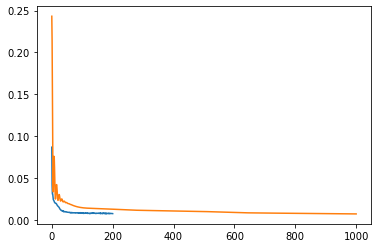

In [30]:
plt.plot(qnn.loss)
plt.plot(dnn.loss)
plt.show()

### Hybrid Neural Network

In [ ]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=-2, b=2)

In [ ]:
np.random.seed(42)

layer1 = QLayer(n_qubits=3, n_features=3, n_targets=3, encoder=Encoder(), ansatz=Ansatz(), sampler=Parity(), reps=2, scale=1, backend=backend, shots=10000)
layer2 = Dense(n_features=3, n_targets=1, activation=Identity())
layers = [layer1, layer2]
network = NeuralNetwork(layers=layers, optimizer = Adam(lr=0.1))

In [ ]:
network.train(x, y, epochs=100, verbose=True)
saver(network, data_path("trainability_hybrid_2_layer"))